## Data Preparation and Cleaning

In [1]:
#Importing libraries for dataframe
import numpy as np
import pandas as pd
#Importing warnings to ignore warnings messages
import warnings
warnings.filterwarnings('ignore')
#Importing library for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#Setting maximum visible rows and columns
pd.options.display.max_columns= 500
pd.options.display.max_rows=30000

#Libraries for modelling
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

In [2]:
#Reading the csv file to create a dataframe
telecom = pd.read_csv('telecom_churn_data.csv',encoding ='ISO-8859-1')

In [3]:
#Previewing the dataframe by viewing first 5 records
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
#Identifying the number of float types,integer types and object types columns
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
#Checking the statistical attributes of the numerical columns in the dataframe
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
#To check the number of rows and columns present in the dataframe
print('There are', telecom.shape[0],'rows and',telecom.shape[1],'columns present in the dataframe')

There are 99999 rows and 226 columns present in the dataframe


In [7]:
#custom function to check missing columns based on percentage of missing values
def missingvalcol(dataset, cutoff):
    missing = round(100*(dataset.isnull().sum()/dataset.shape[0]))
    print("There are {} features having more than {}% missing entries".format(len(missing.loc[missing > cutoff]),cutoff))
    return missing.loc[missing > cutoff]

In [8]:
#Let us analyse if there are any customers present who have all the values empty and we can drop them directly.
missingcol = list(missingvalcol(telecom, 2).index)
print ("There are %d customers having missing values for %s"%(len(telecom[telecom[missingcol].isnull().all(axis=1)]),missingcol))
telecom[telecom[missingcol].isnull().all(axis=1)][missingcol].head()

There are 158 features having more than 2% missing entries
There are 369 customers having missing values for ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_o

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [9]:
#Dropping those rows where the customer has no information
telecom = telecom[~telecom[missingcol].isnull().all(axis=1)]

In [10]:
#To check the number of rows and columns present in the dataframe
print('There are', telecom.shape[0],'rows and',telecom.shape[1],'columns present in the dataframe')

There are 99630 rows and 226 columns present in the dataframe


In [11]:
#Custom function to impute values

def imputemiss(data,imputecol=False,missingcol=False):
    if imputecol:
        
        #impute values for months (6,7,8,9)
        for col in [a + b for b in ['_6','_7','_8','_9'] for a in imputecol]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingcol:
            data[col].fillna(0, inplace=True)

In [12]:
# For the columns, we are imputing all the values with 0.
imputeval = ['total_rech_data','fb_user','av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'night_pck_user']
imputemiss(telecom,imputeval)

In [13]:
#To check the number of columns having more than 70% missing data
missingvalcol(telecom,70)

There are 4 features having more than 70% missing entries


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
dtype: float64

In [14]:
#Dropping the fields that have more than 70% data
telecom = telecom.drop(telecom.loc[:,list(round(100*(telecom.isnull().sum()/len(telecom.index)), 2)>70)].columns, 1)

In [15]:
#To check the number of rows and columns present in the dataframe
print('There are', telecom.shape[0],'rows and',telecom.shape[1],'columns present in the dataframe')

There are 99630 rows and 222 columns present in the dataframe


In [16]:
#Checking columns for more than 0% missing data
missingvalcol(telecom,0)

There are 125 features having more than 0% missing entries


loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
onnet_mou_6             4.0
onnet_mou_7             4.0
onnet_mou_8             5.0
onnet_mou_9             7.0
offnet_mou_6            4.0
offnet_mou_7            4.0
offnet_mou_8            5.0
offnet_mou_9            7.0
roam_ic_mou_6           4.0
roam_ic_mou_7           4.0
roam_ic_mou_8           5.0
roam_ic_mou_9           7.0
roam_og_mou_6           4.0
roam_og_mou_7           4.0
roam_og_mou_8           5.0
roam_og_mou_9           7.0
loc_og_t2t_mou_6        4.0
loc_og_t2t_mou_7        4.0
loc_og_t2t_mou_8        5.0
loc_og_t2t_mou_9        7.0
loc_og_t2m_mou_6        4.0
loc_og_t2m_mou_7        4.0
loc_og_t2m_mou_8        5.0
loc_og_t2m_mou_9        7.0
loc_og_t2f_mou_6        4.0
loc_og_t2f_mou_7        4.0
loc_og_t2f_mou_8        5.0
loc_og_t2f_mou_9        7.0
loc_og_t2c_mou_6        4.0
loc_og_t2c_mou_7        4.0
loc_og_t2c_mou_8    

In [17]:
#We can observe that we have dates columns as well that have missing values. Imputing missing values for \nthem would be handled separetely
missingcol_list = list(missingvalcol(telecom, 0).index)
missingcol_list.remove('date_of_last_rech_6')
missingcol_list.remove('date_of_last_rech_7')
missingcol_list.remove('date_of_last_rech_8')
missingcol_list.remove('date_of_last_rech_9')
missingcol_list.remove('last_date_of_month_8')
missingcol_list.remove('last_date_of_month_9')

imputemiss(telecom,missingcol=missingcol_list)

There are 125 features having more than 0% missing entries


In [18]:
#Checking the remaining columns with the missing data
missingvalcol(telecom,0)

There are 6 features having more than 0% missing entries


last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_6     1.0
date_of_last_rech_7     1.0
date_of_last_rech_8     3.0
date_of_last_rech_9     4.0
dtype: float64

In [19]:
# We understand that imputing missing dates can only be done with dates. The best possible way to impute it is with finding mode.
# Lets find the mode for each date column

telecom_date_col = ['last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']
telecom[telecom_date_col].mode()

,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,8/31/2014,9/30/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014


In [20]:
# We shall now impute the missing values of date columns with mode
telecom['last_date_of_month_8']=telecom['last_date_of_month_8'].fillna('8/31/2014')
telecom['last_date_of_month_9']=telecom['last_date_of_month_9'].fillna('9/30/2014')
telecom['date_of_last_rech_8']=telecom['date_of_last_rech_8'].fillna('8/31/2014')
telecom['date_of_last_rech_8']=telecom['date_of_last_rech_8'].fillna('8/31/2014')
telecom['date_of_last_rech_9']=telecom['date_of_last_rech_9'].fillna('9/29/2014')
telecom['date_of_last_rech_6']=telecom['date_of_last_rech_6'].fillna('6/30/2014')
telecom['date_of_last_rech_7']=telecom['date_of_last_rech_7'].fillna('7/31/2014')

In [21]:
#Let us finally check if there exists missing values in any of the rows or columns
missingvalcol(telecom,0)

There are 0 features having more than 0% missing entries


Series([], dtype: float64)

In [22]:
#Let us now check how many columns are there that have such one value through out.
unique_val = telecom.columns[telecom.nunique()==1]
unique_val

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [23]:
#Leaving the dates we can safely drop the other columns
telecom = telecom.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
                       'std_og_t2c_mou_8','std_og_t2c_mou_9','std_og_t2c_mou_7','std_og_t2c_mou_8',
                       'std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9'],axis=1)

In [24]:
#To check the number of rows and columns present in the dataframe
print('There are', telecom.shape[0],'rows and',telecom.shape[1],'columns present in the dataframe')

There are 99630 rows and 210 columns present in the dataframe


In [25]:
#Changing the format of date columns to date time format as all the date formats are not consistent
telecom['last_date_of_month_6'] = pd.to_datetime(telecom['last_date_of_month_6'], format='%m/%d/%Y')
telecom['last_date_of_month_7'] = pd.to_datetime(telecom['last_date_of_month_7'], format='%m/%d/%Y')
telecom['last_date_of_month_8'] = pd.to_datetime(telecom['last_date_of_month_8'], format='%m/%d/%Y')
telecom['last_date_of_month_9'] = pd.to_datetime(telecom['last_date_of_month_9'], format='%m/%d/%Y')
telecom['date_of_last_rech_6'] = pd.to_datetime(telecom['date_of_last_rech_6'], format='%m/%d/%Y')
telecom['date_of_last_rech_7'] = pd.to_datetime(telecom['date_of_last_rech_7'], format='%m/%d/%Y')
telecom['date_of_last_rech_8'] = pd.to_datetime(telecom['date_of_last_rech_8'], format='%m/%d/%Y')
telecom['date_of_last_rech_9'] = pd.to_datetime(telecom['date_of_last_rech_9'], format='%m/%d/%Y')

In [26]:
#We have columns whose names start with month.We shall rename columns with jun,july,aug,sep etc and suffix with _6 ,_7,_8,_9
telecom.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

In [27]:
# We are going to create two new features, i.e., combining vol of 2g and 3g
telecom['total_data_mb_6'] = telecom['vol_2g_mb_6']+telecom['vol_3g_mb_6']
telecom['total_data_mb_7'] = telecom['vol_2g_mb_7']+telecom['vol_3g_mb_7']
telecom['total_data_mb_8'] = telecom['vol_2g_mb_8']+telecom['vol_3g_mb_8']
telecom['total_data_mb_9'] = telecom['vol_2g_mb_9']+telecom['vol_3g_mb_9']

In [28]:
#Creating new column to check how many number of recharges were done for data top up in each month
telecom['count_rech_data_6'] = telecom['count_rech_2g_6']+telecom['count_rech_3g_6'] 
telecom['count_rech_data_7'] = telecom['count_rech_2g_7']+telecom['count_rech_3g_7'] 
telecom['count_rech_data_8']= telecom['count_rech_2g_8']+telecom['count_rech_3g_8'] 
telecom['count_rech_data_9'] = telecom['count_rech_2g_9']+telecom['count_rech_3g_9'] 

#Creating new column to see the total data recharge done in each month
telecom['total_rech_amt_data_6'] = telecom['count_rech_data_6']*telecom['av_rech_amt_data_6']
telecom['total_rech_amt_data_7'] = telecom['count_rech_data_7']*telecom['av_rech_amt_data_7']
telecom['total_rech_amt_data_8'] = telecom['count_rech_data_8']*telecom['av_rech_amt_data_8']
telecom['total_rech_amt_data_9'] = telecom['count_rech_data_9']*telecom['av_rech_amt_data_9']  

#Creating new column to see total amount of money spent on data & non-data
telecom['total_month_rech_6'] = telecom['total_rech_amt_6']+telecom['total_rech_amt_data_6']
telecom['total_month_rech_7'] = telecom['total_rech_amt_7']+telecom['total_rech_amt_data_7']
telecom['total_month_rech_8'] = telecom['total_rech_amt_8']+telecom['total_rech_amt_data_8']
telecom['total_month_rech_9'] = telecom['total_rech_amt_9']+telecom['total_rech_amt_data_9']

In [29]:
#Lets check if there are any missing values present in the dataset
missingvalcol(telecom,0)

There are 0 features having more than 0% missing entries


Series([], dtype: float64)

#### High valued customers would bring in more revenue and having them churn would be a huge loss to business. Our aim is to identify the high valued customers and try not to make them churn. Let us first identify the high valued customers.

The steps would be :
1. For the first two months calculate the average amount of money spent on recharge.
2. Calcuate the 70 percentile and above that cut-off would be high valued customer.

In [30]:
#Calculating average of total recharge amounts in the month for June and July
telecom['average_good_phase'] = (telecom['total_month_rech_6']+telecom['total_month_rech_7'])/2

In [31]:
#Creating a filter to only accept recharge amount greater or equal to 70 quartile of recharge good
cut = telecom['average_good_phase'].describe(percentiles=[0.1,0.3,0.5,0.7,0.9])['70%']
telecom_high_cust = telecom[telecom['average_good_phase']>=cut]

In [32]:
#To check the number of rows and columns present in the filtered dataframe
print('There are', telecom_high_cust.shape[0],'rows and',telecom_high_cust.shape[1],'columns present in the dataframe')

There are 29909 rows and 227 columns present in the dataframe


In [33]:
#Tagging the Churning people with 1 and non churning people with 0
telecom_high_cust['churn']=np.where(((telecom_high_cust['total_ic_mou_9']==0) | (telecom_high_cust['total_og_mou_9']==0)) & ((telecom_high_cust['vol_2g_mb_9']==0) & (telecom_high_cust['vol_3g_mb_9']==0)),1,0)

In [34]:
#Checking the number of people who are going to churn in September
print('The number of people that are going to churn in September are :',telecom_high_cust[telecom_high_cust['churn']==1].shape[0])
print('The number of people that are not going to churn in September are :',telecom_high_cust[telecom_high_cust['churn']==0].shape[0])

The number of people that are going to churn in September are : 2813
The number of people that are not going to churn in September are : 27096


In [35]:
#Dropping columns with suffix _9 from the dataframe
telecom_final = telecom_high_cust.drop(telecom_high_cust.filter(regex='_9').columns, axis=1)

In [36]:
#Checking the number of rows and columns present
print('There are', telecom_final.shape[0],'rows and',telecom_final.shape[1],'columns present in the dataframe')

There are 29909 rows and 172 columns present in the dataframe


In [37]:
#Before we proceed for EDA, let us take a back up for our dataset
telecom_churn = telecom_final

## Exploratory Data Analysis

In [38]:
#Let us check the statistical information about telecom_final
telecom_final.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_mb_6,total_data_mb_7,total_data_mb_8,count_rech_data_6,count_rech_data_7,count_rech_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,average_good_phase,churn
count,2.990900e+04,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.00000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,29909.000000,

In [39]:
#Identifying the number of float types,integer types and object types columns
telecom_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29909 entries, 0 to 99997
Columns: 172 entries, mobile_number to churn
dtypes: datetime64[ns](6), float64(139), int32(1), int64(26)
memory usage: 39.4 MB


We shall analyse the features with respect to churn to understand what is leading the customers to churn

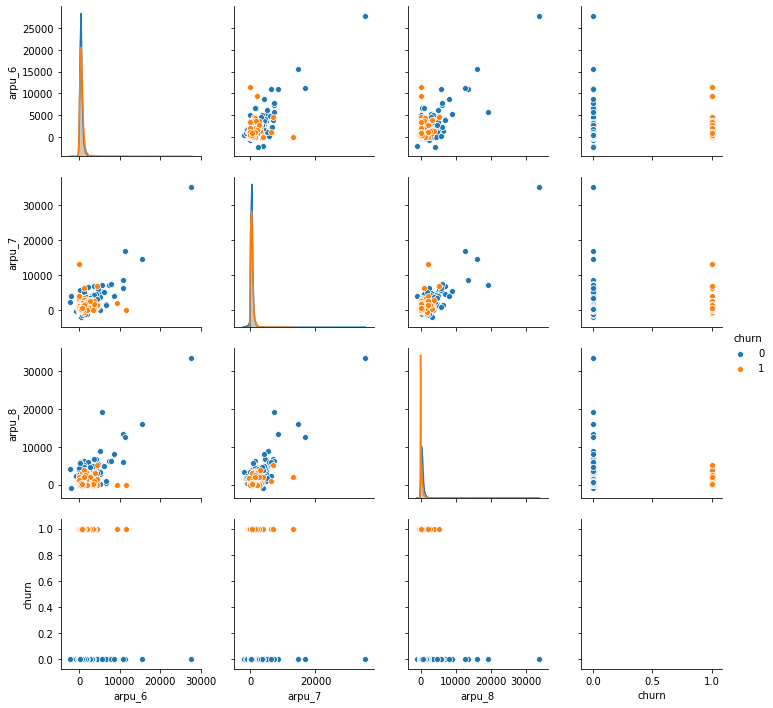

In [40]:
# Plotting Average Revenue per User vs Churn
sns.pairplot(data=telecom_final[['arpu_6','arpu_7','arpu_8','churn']],hue='churn')

- Average revenue from the churning customers have been decreasing constantly over the 3 months
- Average revenue from the non - churning customers have been constantly hovering close to 20000

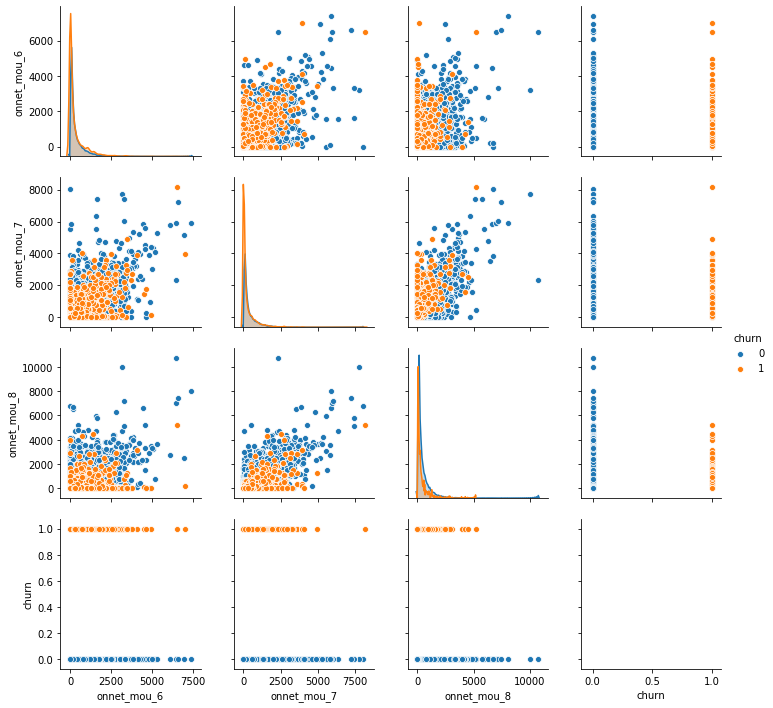

In [41]:
#Plotting On network/same network usage against churn
sns.pairplot(data=telecom_final[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn']],hue='churn')

- Calls within the same network from the churning customers have been decreasing constantly over the 3 months
- Calls within the same network from the non - churning customers have been constantly hovering close to 8000

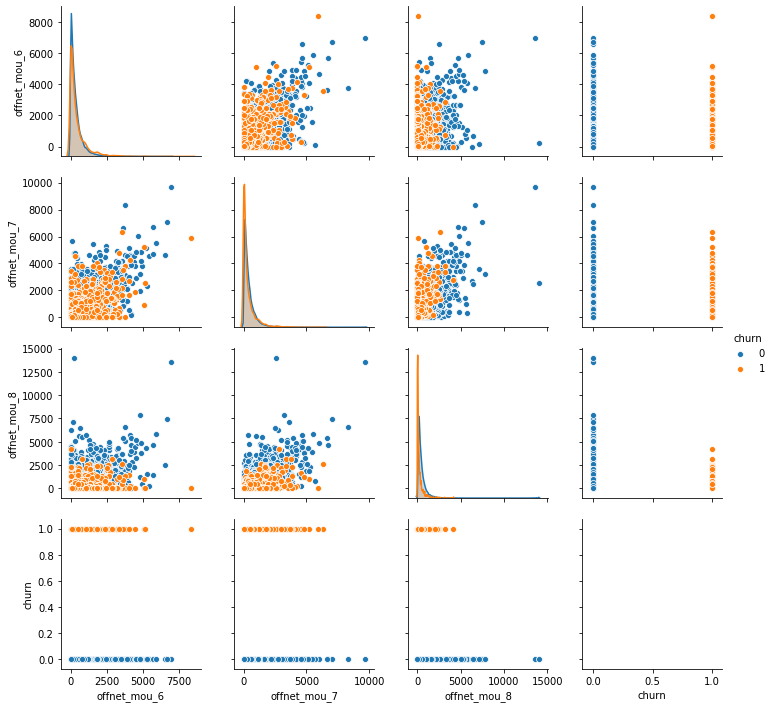

In [42]:
#Calls outside network vs Churn
sns.pairplot(data=telecom_final[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn']],hue='churn')

- Calls outside the same network is almost constant for good phase, but has considerably reduced over action phase for churned customers.

- Calls outside the same network has reduced for action phase does not call for considerable change.

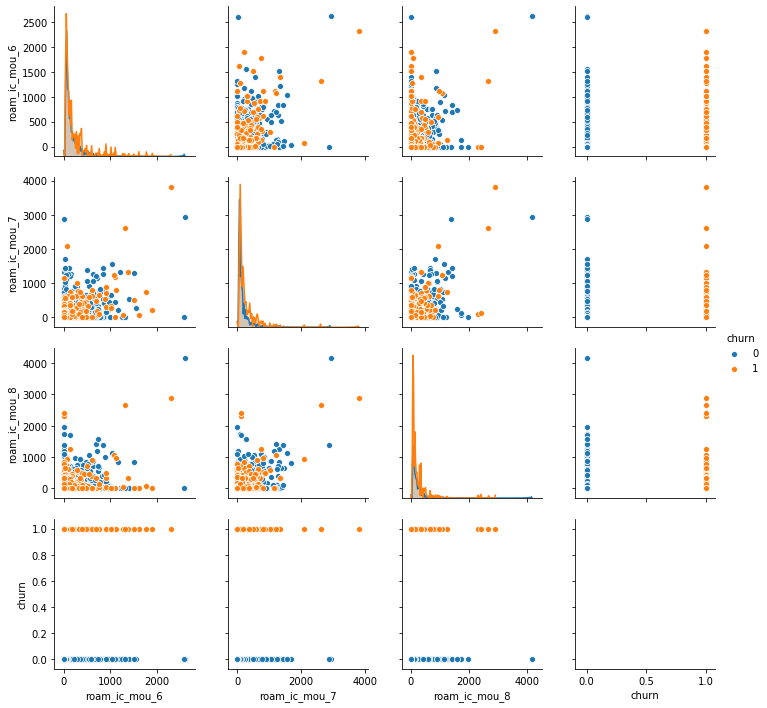

In [43]:
#Customer in roaming zone vs Churn
sns.pairplot(data=telecom_final[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn']],hue='churn')

- Roaming calls were more for churned customers in good phase and reduces by action phase, which means a possible reason for churn is the transfer of location.

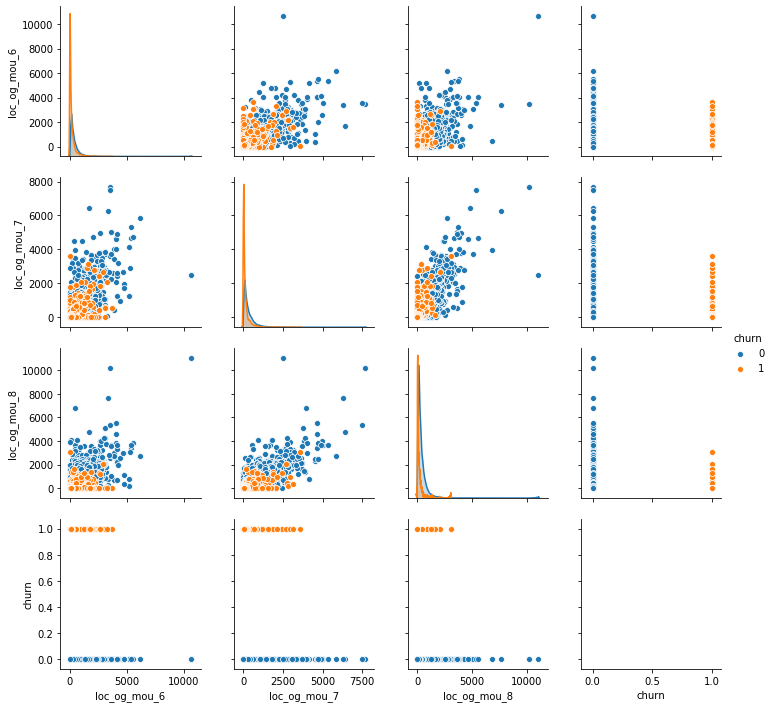

In [44]:
#Customer within circle and outgoing calls vs Churn
sns.pairplot(data=telecom_final[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn']],hue='churn')

- Local outgoing does not call for considerable difference during the good phase and the action phase for churned or unchurned customers.

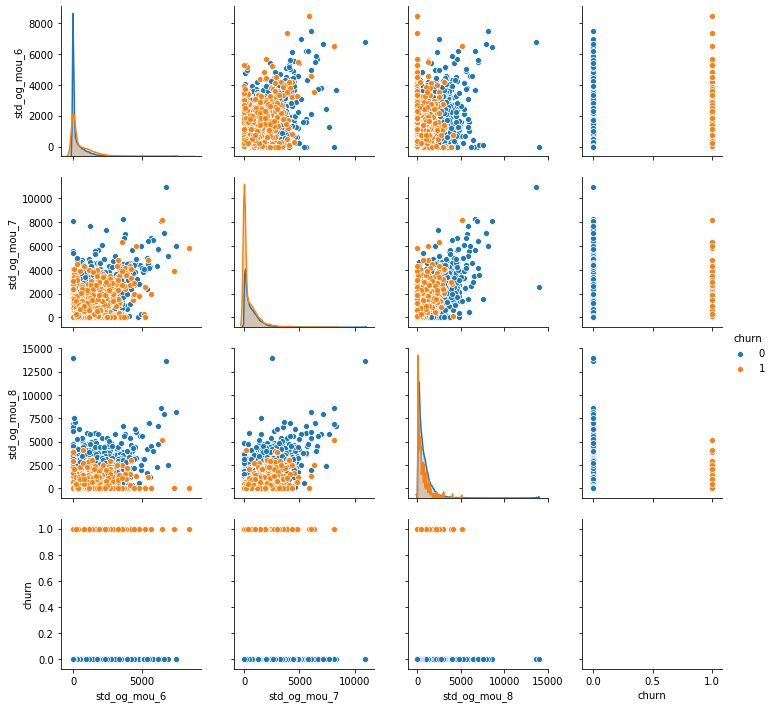

In [45]:
#Outside calling calls vs Churn
sns.pairplot(data=telecom_final[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn']],hue='churn')

- Std outgoing calls for churned customers does not have much impact over the months

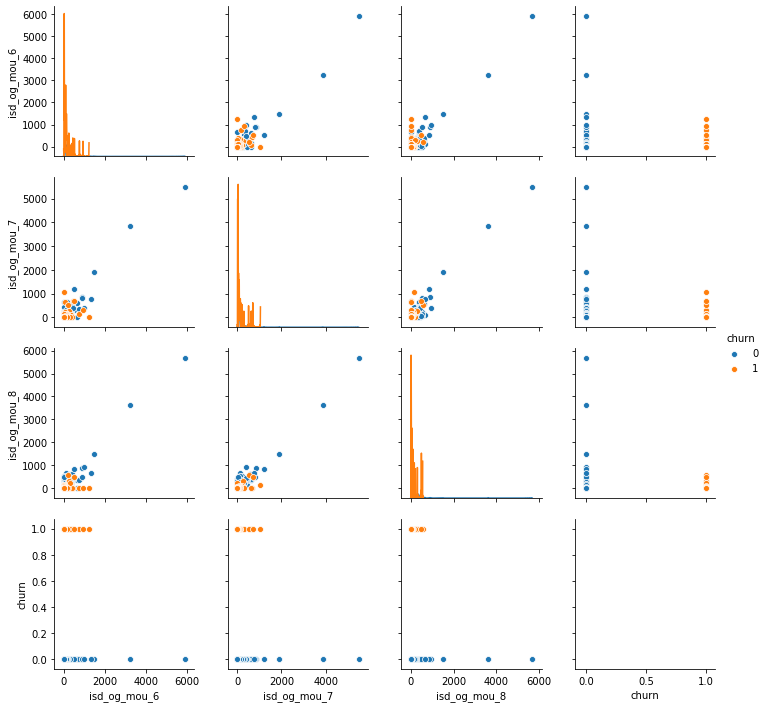

In [46]:
#International Calls vs Churn
sns.pairplot(data=telecom_final[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','churn']],hue='churn')

- ISD calls has reduced a bit for churned customers over 8th month

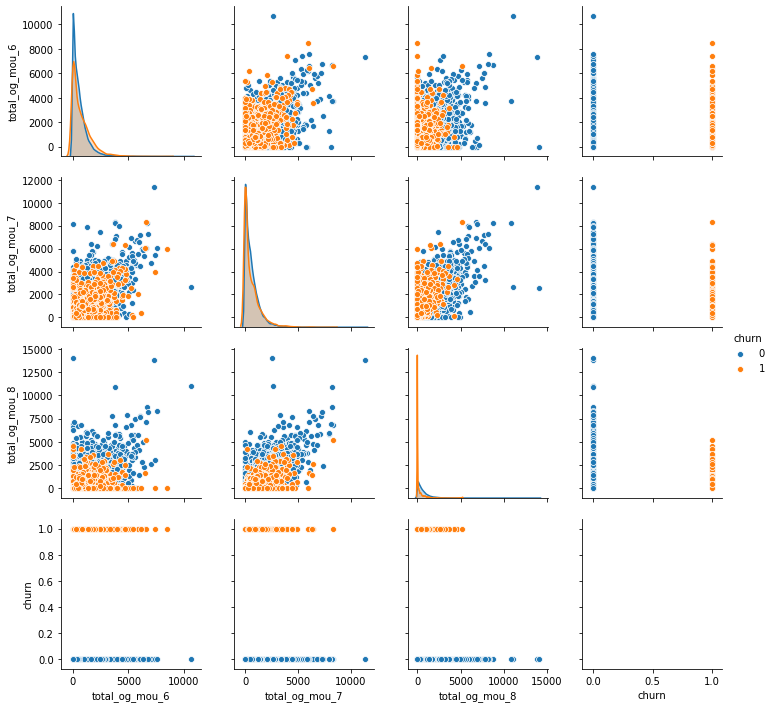

In [47]:
#Total Outgoing calls vs Churn
sns.pairplot(data=telecom_final[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']],hue='churn')

- Total outgoing calls have reduced for the action phase for churned customers

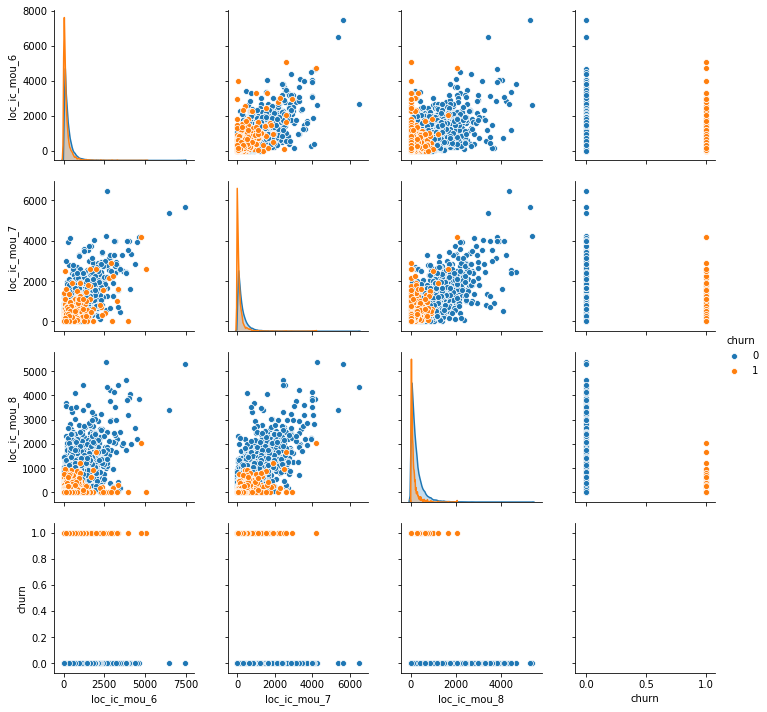

In [48]:
#Incoming local calls vs Churn
sns.pairplot(data=telecom_final[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn']],hue='churn')

- Local incoming also has reduced over the 8th month

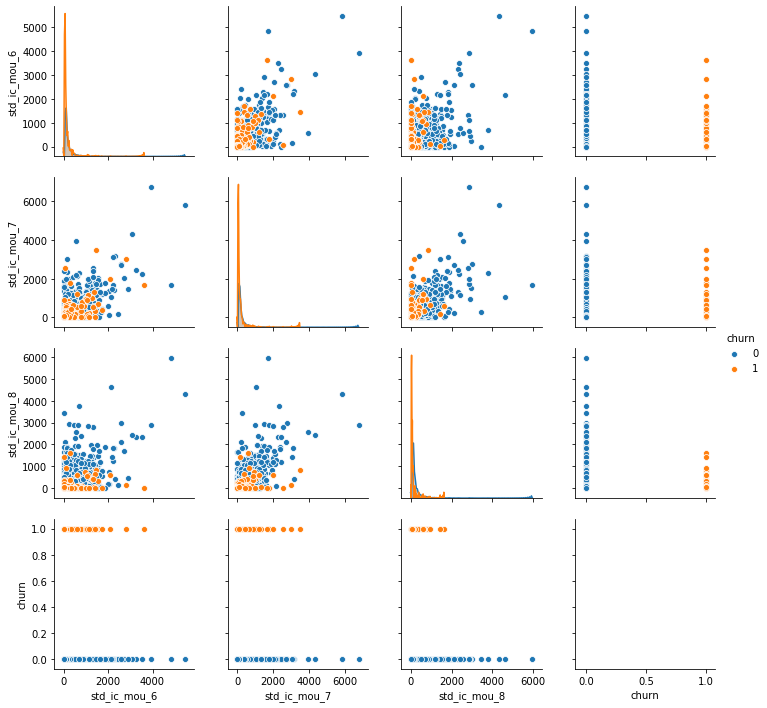

In [49]:
#Outside circle incoming calls vs Churn
sns.pairplot(data=telecom_final[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churn']],hue='churn')

- National incoming calls also have decreased for churned customers for action phase

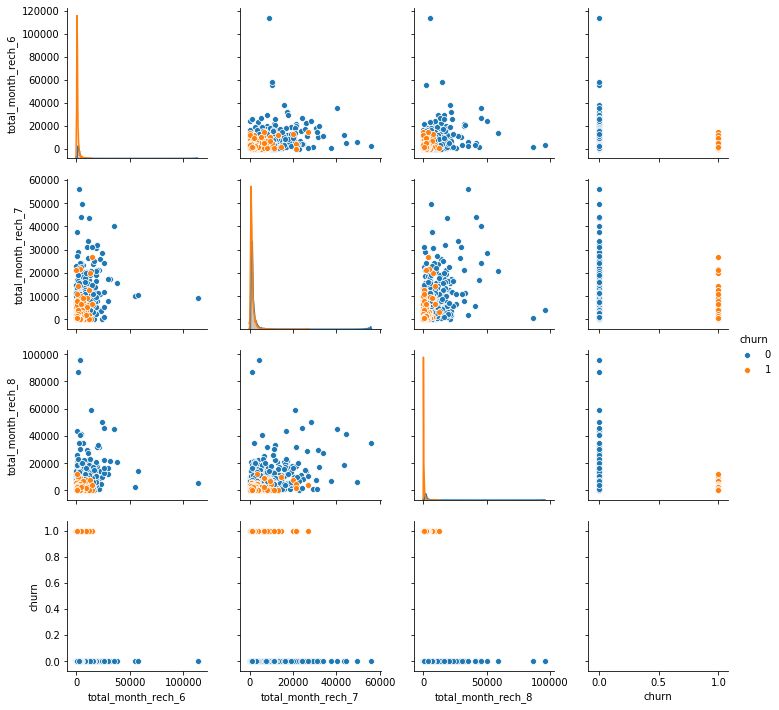

In [50]:
#Total amount spent on recharge by a customer
sns.pairplot(data=telecom_final[['total_month_rech_6','total_month_rech_7','total_month_rech_8','churn']],hue='churn')

- Total recharge for good phase and action phase is considerably difficult to differentiate any decrease.

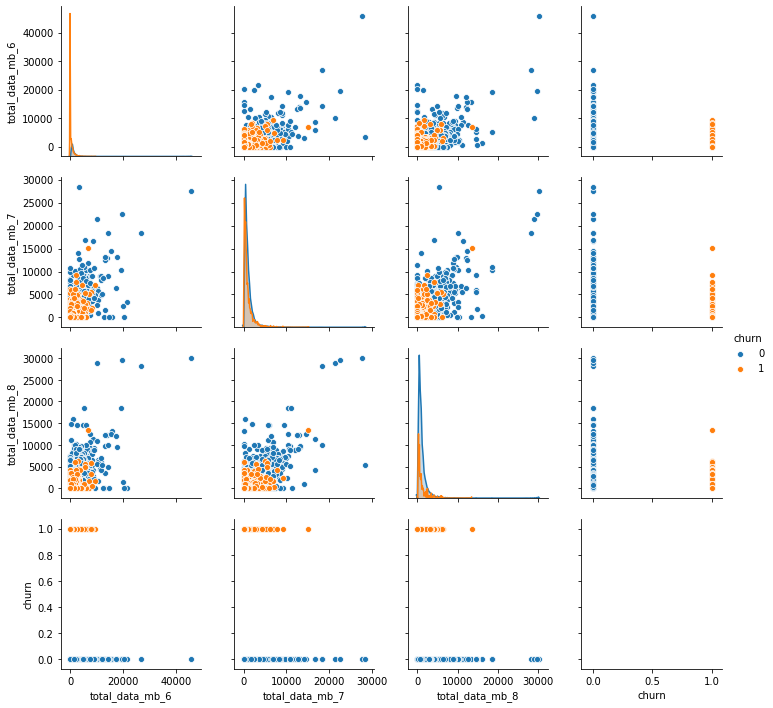

In [51]:
#Total data consumption based vs Churn
sns.pairplot(data=telecom_final[['total_data_mb_6','total_data_mb_7','total_data_mb_8','churn']],hue='churn')

- Data used has also reduced over the three months.

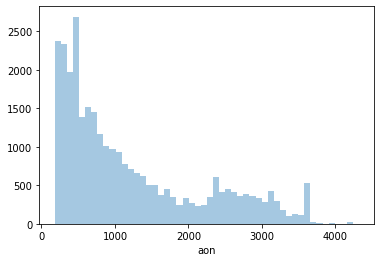

In [52]:
#Analyse AON (time spent on network)
sns.distplot(telecom_final['aon'],kde=False)

In [53]:
#Since AON is in number of days we can convert AON into years
telecom_final['aon_years'] = round((telecom_final['aon']/365),0)
telecom_final['aon_years'].head()

0     3.0
7     2.0
8     1.0
21    2.0
23    2.0
Name: aon_years, dtype: float64

In [54]:
#Converting aon_years into categorical variable
telecom_final['aon_years']=telecom_final['aon_years'].astype('object')

In [55]:
telecom_final['aon_years'].head()

0     3
7     2
8     1
21    2
23    2
Name: aon_years, dtype: object

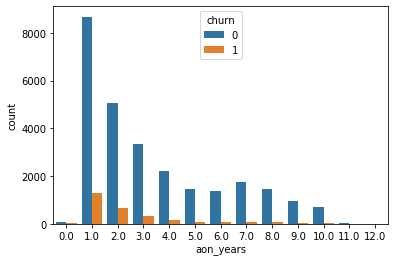

In [56]:
#Checking the AON_YEARS occurence
sns.countplot(x=telecom_final['aon_years'],hue=telecom_final['churn'])

- From the above graph we can infer that maximum people who wish to leave are the people who are in the first year of joining.
- The count of churn decreases as the age of the customer with the network increases

We shall analyse the outgoing calls,incoming calls and the recharge done across the three months to see the increase and decrease in number

In [57]:
incoming_calls = telecom_final.filter(regex='total_ic_mou').columns
avg_ic_mon_calls = pd.DataFrame(telecom_final.groupby('aon_years',as_index=False)[incoming_calls].mean())
print(avg_ic_mon_calls)

    aon_years  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
0         0.0      195.372444      218.856778      190.733111
1         1.0      235.572941      242.520932      224.735216
2         2.0      264.678503      269.576277      247.102325
3         3.0      286.446545      295.584371      278.652047
4         4.0      306.379543      315.006592      300.074098
5         5.0      353.445113      359.782724      338.450471
6         6.0      349.455338      354.920369      354.022679
7         7.0      380.044290      384.781872      369.184627
8         8.0      391.091506      399.557554      382.888430
9         9.0      377.022064      387.312044      378.681319
10       10.0      405.523115      409.338631      408.680852
11       11.0      464.702059      451.680588      415.940000
12       12.0      413.626667      396.713333      393.300000


In [58]:
outgoing_calls = telecom_final.filter(regex='total_og_mou').columns
avg_og_mon_calls = pd.DataFrame(telecom_final.groupby('aon_years',as_index=False)[outgoing_calls].mean())
print(avg_og_mon_calls)

    aon_years  total_og_mou_6  total_og_mou_7  total_og_mou_8
0         0.0      687.816222      722.277222      591.782778
1         1.0      606.320979      630.870251      529.316583
2         2.0      654.775200      690.464746      585.727785
3         3.0      631.888777      641.134346      570.654865
4         4.0      616.628899      631.383497      567.418764
5         5.0      596.535726      600.776779      563.242976
6         6.0      586.853417      594.817704      564.456110
7         7.0      595.275958      603.428255      564.826991
8         8.0      551.791402      559.352998      524.552953
9         9.0      519.815559      513.755791      484.440715
10       10.0      557.277263      553.971159      534.291578
11       11.0      410.894706      414.671765      427.520882
12       12.0      489.610000      525.233333      406.490000


In [59]:
total_month_rech = telecom_final.filter(regex='total_month_rech').columns
avg_total_month_rech = pd.DataFrame(telecom_final.groupby('aon_years',as_index=False)[total_month_rech].mean())
print(avg_total_month_rech)

    aon_years  total_month_rech_6  total_month_rech_7  total_month_rech_8
0         0.0         1030.611111         1215.011111          852.922222
1         1.0         1158.268452         1223.996388         1054.730156
2         2.0         1175.663725         1257.596066         1064.822799
3         3.0         1129.214732         1206.391106         1092.651133
4         4.0         1118.480737         1213.428874         1094.714221
5         5.0         1080.502260         1157.029135         1058.576501
6         6.0          988.818720         1085.327766         1037.232777
7         7.0         1023.812258         1060.679183          962.292380
8         8.0         1055.691110         1140.346204         1015.911421
9         9.0          999.622356         1018.368580          938.223061
10       10.0          940.199721         1025.324022          954.690642
11       11.0          742.323529          714.764706          856.970588
12       12.0         4003.333333     

Text(0, 0.5, 'Avg. incoming monthly call')

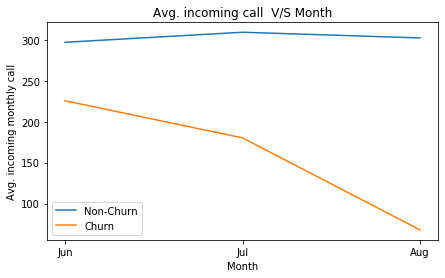

In [60]:
fig, ax = plt.subplots(figsize=(7,4))
df=telecom_final.groupby(['churn'])[incoming_calls].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug'])
## Add legend
plt.legend(['Non-Churn', 'Churn'])
# Add titles
plt.title("Avg. incoming call  V/S Month",fontsize=12)
plt.xlabel("Month")
plt.ylabel("Avg. incoming monthly call")

Text(0, 0.5, 'Avg. outgoing monthly call')

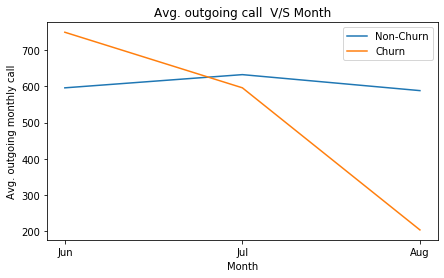

In [61]:
fig, ax = plt.subplots(figsize=(7,4))
df=telecom_final.groupby(['churn'])[outgoing_calls].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug'])
## Add legend
plt.legend(['Non-Churn', 'Churn'])
# Add titles
plt.title("Avg. outgoing call  V/S Month",fontsize=12)
plt.xlabel("Month")
plt.ylabel("Avg. outgoing monthly call")

Text(0, 0.5, 'Avg. recharge')

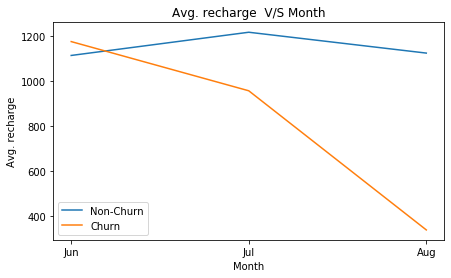

In [62]:
fig, ax = plt.subplots(figsize=(7,4))
df=telecom_final.groupby(['churn'])[total_month_rech].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug'])
## Add legend
plt.legend(['Non-Churn', 'Churn'])
# Add titles
plt.title("Avg. recharge  V/S Month",fontsize=12)
plt.xlabel("Month")
plt.ylabel("Avg. recharge")

 - For churning customer we can observe that there are significant dropping from June to July and then dropping sharply from July to Aug that is almost trending 0.
 - For Non Churning customers we can observe that there is an increase in number from June to July but again there is a slight decrease from July to August.
 - The outgoing calls,incoming calls and total recharge have been decreasing for all the churning customers.


In [63]:
#To see which all are highly correlated with correlation value is equal or greater than 0.80
joincorr= telecom_final.corr()
telecom_final_corr = joincorr.stack().reset_index().sort_values(by = 0, ascending = False)
telecom_final_corr[((telecom_final_corr[0] < 1) & (telecom_final_corr[0] >= 0.8)) | ((telecom_final_corr[0] <= -0.8) & (telecom_final_corr[0] > -1))]

,level_0,level_1,0
18564,count_rech_2g_8,sachet_2g_8,0.987202
23019,sachet_2g_8,count_rech_2g_8,0.987202
22852,sachet_2g_7,count_rech_2g_7,0.986431
18397,count_rech_2g_7,sachet_2g_7,0.986431
22685,sachet_2g_6,count_rech_2g_6,0.984944
18230,count_rech_2g_6,sachet_2g_6,0.984944
594,arpu_8,total_rech_amt_8,0.955321
15939,total_rech_amt_8,arpu_8,0.955321
25687,total_data_mb_8,vol_3g_mb_8,0.946299
20572,vol_3g_mb_8,total_data_mb_8,0.946299


In [64]:
#Dropping all the date columns from the dataframe before proceeding for modelling
telecom_final = telecom_final.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1)

## Modelling

In [65]:
#Let us separate independent and dependent variable
X = telecom_final.drop('churn',axis=1)
y = telecom_final[['churn']]

#### Feature Scaling

In [66]:
#Scaling all the values of X dataframe to reduce all kinds of distortion
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#### Train Test Split

In [67]:
# Splitting the data into train and test with 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,y, train_size=0.7,test_size=0.3)

In [68]:
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (20936, 166)
Training dataset target size (20936, 1)
Test dataset size (8973, 166)
Test dataset target size (8973, 1)


#### Data Imbalance treatment with SMOTE

In [69]:
sm = SMOTE()
X_train_res,y_train_res = sm.fit_resample(X_train,y_train)

In [70]:
print("Training dataset size after oversampling",X_train_res.shape)
print("Training dataset target size after oversampling",y_train_res.shape)

Training dataset size after oversampling (37894, 166)
Training dataset target size after oversampling (37894,)


#### PCA

In [71]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [72]:
#Doing the PCA on the train data
pca.fit(X_train_res)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [73]:
pca.components_

array([[-4.96191184e-03, -4.52571220e-02, -3.00296544e-02, ...,
         8.53555801e-02,  1.25146047e-01,  4.25193140e-03],
       [ 2.48582451e-02,  1.62611596e-01,  1.85832730e-01, ...,
         9.06259330e-02,  8.29582007e-02,  5.08153923e-02],
       [-2.71977445e-02,  5.94997241e-02,  7.48261604e-02, ...,
         8.83391518e-02,  1.49596584e-01, -8.18300769e-02],
       ...,
       [ 0.00000000e+00, -1.20775675e-17, -8.61917564e-17, ...,
         4.80078678e-02, -5.07123787e-02, -1.55368065e-16],
       [ 0.00000000e+00, -1.57815845e-17, -4.03606528e-17, ...,
         3.80255026e-11, -6.91848426e-12, -8.08806194e-18],
       [-0.00000000e+00, -4.72433047e-17, -1.06887989e-16, ...,
        -1.50722489e-11, -4.51151360e-12,  9.84789077e-18]])

In [74]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.004962,0.024858,mobile_number
1,-0.045257,0.162612,arpu_6
2,-0.030030,0.185833,arpu_7
3,0.000900,0.183778,arpu_8
4,-0.110449,0.086671,onnet_mou_6


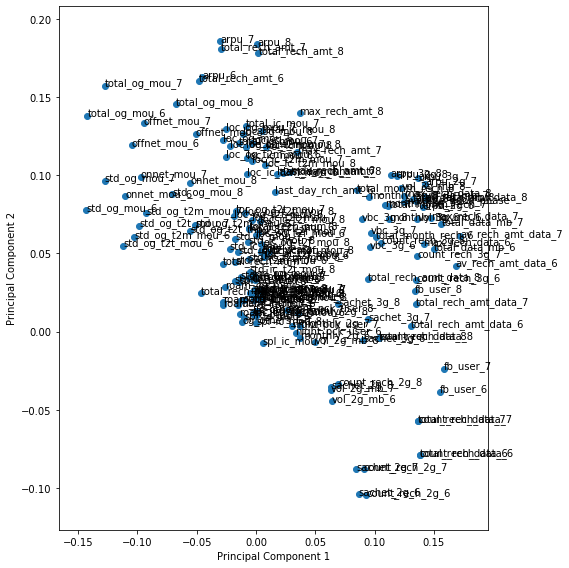

In [75]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [76]:
pca.explained_variance_ratio_

array([1.29659485e-01, 9.05279250e-02, 6.51688632e-02, 5.83318411e-02,
       3.54447541e-02, 3.20655539e-02, 3.06008083e-02, 2.94482381e-02,
       2.82379469e-02, 2.32349283e-02, 2.15450122e-02, 1.98615612e-02,
       1.82890555e-02, 1.74295866e-02, 1.54535311e-02, 1.50755516e-02,
       1.34726029e-02, 1.29550731e-02, 1.22672220e-02, 1.14103099e-02,
       1.06909676e-02, 1.05609024e-02, 1.00342296e-02, 9.85057221e-03,
       9.73265112e-03, 9.53960289e-03, 9.50251960e-03, 8.72594465e-03,
       8.55667497e-03, 8.01172055e-03, 7.79066454e-03, 7.69345480e-03,
       7.41564516e-03, 6.68233949e-03, 6.53727060e-03, 6.31161854e-03,
       5.97988820e-03, 5.80447763e-03, 5.78273264e-03, 5.63492088e-03,
       5.55819487e-03, 5.44367799e-03, 5.28753723e-03, 5.14838516e-03,
       5.11310589e-03, 4.86666754e-03, 4.76341536e-03, 4.25231766e-03,
       4.23655894e-03, 4.13865047e-03, 4.03788752e-03, 3.79413996e-03,
       3.74750655e-03, 3.64749838e-03, 3.33882584e-03, 3.17490773e-03,
      

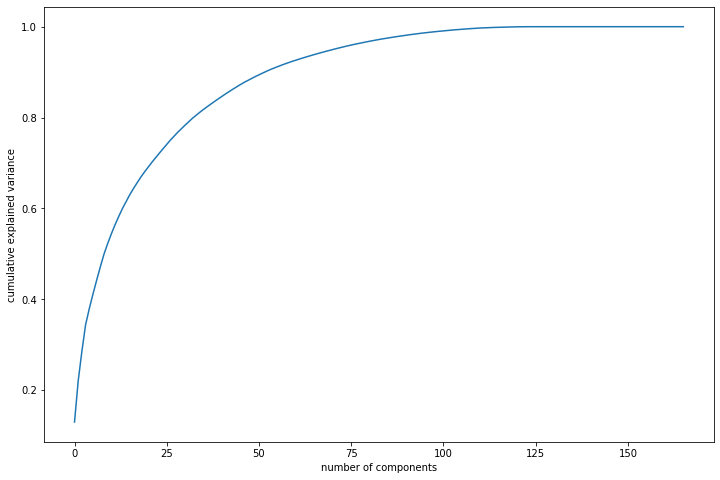

In [77]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [78]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)

In [79]:
df_train_pca = pca_final.fit_transform(X_train_res)
df_train_pca.shape

(37894, 60)

In [80]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

In [81]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
#The correlation values will be very close to 0

max corr: 0.011550552016962881 , min corr:  -0.026088815580891045


In [82]:
#Applying selected components to the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8973, 60)

#### Logistic Regression with PCA

In [83]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression

logreg_pca = LogisticRegression()
model_logreg_pca = logreg_pca.fit(df_train_pca,y_train_res)

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8149
           1       0.31      0.80      0.45       824

    accuracy                           0.82      8973
   macro avg       0.64      0.81      0.67      8973
weighted avg       0.92      0.82      0.85      8973

Accuracy for the test dataset 81.9%
ROC for the test dataset 81.2%


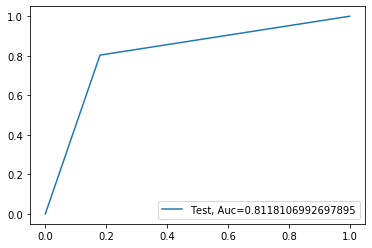

In [84]:
#Let us analyse the all the parameters of the model
pred_logreg = model_logreg_pca.predict(df_test_pca)
prediction_prob_logreg = model_logreg_pca.predict_proba(df_test_pca)[:,1]
print(classification_report(y_test, pred_logreg))
accuracy = metrics.accuracy_score(y_test, pred_logreg)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, pred_logreg)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, Auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

#### Random Forest - PCA (With Default Hyperparameters)

In [85]:
rfc_pca = RandomForestClassifier()

In [86]:
model_rfc_pca = rfc_pca.fit(df_train_pca,y_train_res)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      8149
           1       0.40      0.44      0.42       824

    accuracy                           0.89      8973
   macro avg       0.67      0.69      0.68      8973
weighted avg       0.89      0.89      0.89      8973

Accuracy for the test dataset 88.7%
ROC for the test dataset 82.9%


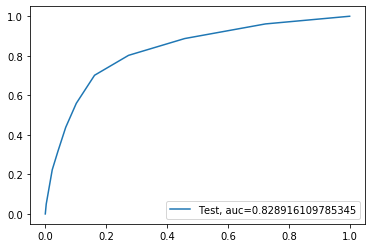

In [87]:
pred_rfc =model_rfc_pca.predict(df_test_pca)
pred_prob_rfc=model_rfc_pca.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, pred_rfc))
accuracy = metrics.accuracy_score(y_test, pred_rfc)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

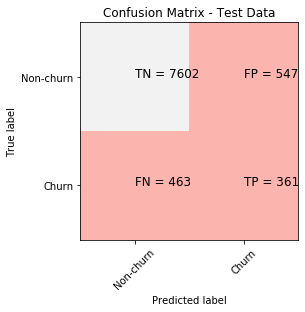

In [88]:
cm = confusion_matrix(y_test, pred_rfc)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

#### Random Forest with PCA(Hyperparameters Tuning) 

##### Finding optimal hyperparameters

In [89]:
# GridSearchCV to find optimal hyperparameter

param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [25, 50]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

#####Fit the grid search to the data
grid_search.fit(df_train_pca, y_train_res)

In [90]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=25,
                             n_estimators=300)

In [91]:
rfc_pca_tune = rfc.fit(df_train_pca,y_train_res)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      8149
           1       0.35      0.74      0.47       824

    accuracy                           0.85      8973
   macro avg       0.66      0.80      0.69      8973
weighted avg       0.91      0.85      0.87      8973

Accuracy for the test dataset 84.8%
ROC for the test dataset 87.1%


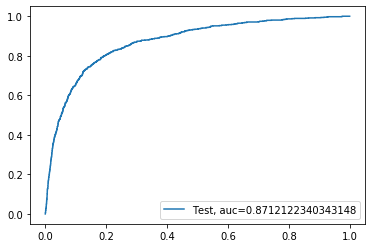

In [92]:
pred_rfc_tune =rfc_pca_tune.predict(df_test_pca)
pred_prob_rfc_tune=rfc_pca_tune.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, pred_rfc_tune))
accuracy = metrics.accuracy_score(y_test, pred_rfc_tune)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob_rfc_tune)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

#### Logistic Regression without PCA

In [93]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
model_logreg = logreg.fit(X_train_res,y_train_res)

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8149
           1       0.32      0.81      0.46       824

    accuracy                           0.82      8973
   macro avg       0.65      0.82      0.68      8973
weighted avg       0.92      0.82      0.85      8973

Accuracy for the test dataset 82.4%
ROC for the test dataset 81.6%


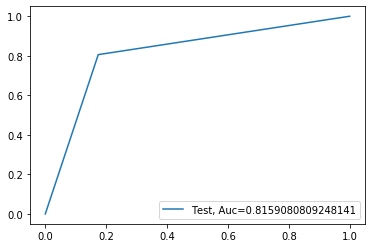

In [94]:
#Let us analyse the all the parameters of the model
predictions = model_logreg.predict(X_test)
prediction_probs = model_logreg.predict_proba(X_test)[:,1]
print(classification_report(y_test, predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, Auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

#### Random Forest without PCA (Default Hyperparameters)

In [95]:
rfc = RandomForestClassifier()

In [96]:
model_rfc= rfc.fit(X_train_res,y_train_res)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      8149
           1       0.54      0.60      0.57       824

    accuracy                           0.92      8973
   macro avg       0.75      0.78      0.76      8973
weighted avg       0.92      0.92      0.92      8973

Accuracy for the test dataset 91.6%
ROC for the test dataset 88.5%


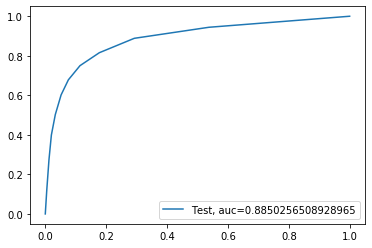

In [97]:
pred_rfc=model_rfc.predict(X_test)
preds_probs_rfc=model_rfc.predict_proba(X_test)[:,1]

print(classification_report(y_test, pred_rfc))
accuracy = metrics.accuracy_score(y_test, pred_rfc)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_rfc)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

##### Random Forest without PCA (Hyperparameter Tuning)

In [98]:
# GridSearchCV to find optimal hyperparameter

param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [25, 50]
}
# Create a based model
rf_hyp = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_hyp, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

#######Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

######Printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [99]:
rf_hyp = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=50,
                             n_estimators=100)

In [100]:
rfc_tune = rf_hyp.fit(X_train_res,y_train_res)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      8149
           1       0.43      0.77      0.55       824

    accuracy                           0.88      8973
   macro avg       0.70      0.83      0.74      8973
weighted avg       0.92      0.88      0.90      8973

Accuracy for the test dataset 88.5%
ROC for the test dataset 91.0%


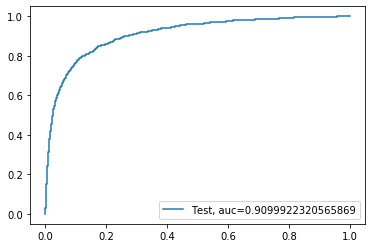

In [101]:
pred_rfc_tune =rfc_tune.predict(X_test)
pred_prob_rfc_tune=rfc_tune.predict_proba(X_test)[:,1]

print(classification_report(y_test, pred_rfc_tune))
accuracy = metrics.accuracy_score(y_test, pred_rfc_tune)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob_rfc_tune)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

## Compilation of models

- Logistic with pca

                precision    recall  f1-score   support

           0       0.97      0.82      0.89      8096
           1       0.32      0.77      0.45       877

Accuracy for the test dataset 81.6%
ROC for the test dataset 79.7%

- Random forest pca with optimal hyper parameter tuning

                 precision    recall  f1-score   support

           0       0.94      0.94      0.94      8117
           1       0.44      0.46      0.45       856

Accuracy for the test dataset 89.4%
ROC for the test dataset 81.9%

- Random forest with pca hyper parameter tuning


                 precision    recall  f1-score   support

           0       0.97      0.86      0.91      8117
           1       0.36      0.72      0.48       856


Accuracy for the test dataset 84.9%
ROC for the test dataset 87.1%


- Logistic Regression without pca

                 precision    recall  f1-score   support

           0       0.97      0.82      0.89      8082
           1       0.33      0.80      0.47       891

Accuracy for the test dataset 82.1%
ROC for the test dataset 81.0%

- Random forest without pca

                 precision    recall  f1-score   support

           0       0.96      0.95      0.96      8117
           1       0.57      0.60      0.59       856

    accuracy                           0.92      8973
   macro avg       0.77      0.78      0.77      8973
weighted avg       0.92      0.92      0.92      8973

Accuracy for the test dataset 91.9%
ROC for the test dataset 88.6%


- Random forest wihtout pca (hyper parameter tuning)

         precision    recall  f1-score   support

           0       0.97      0.90      0.94      8117
           1       0.45      0.75      0.56       856

Accuracy for the test dataset 88.7%
ROC for the test dataset 91.2%

## Model Consideration

- Based on the accuracy and recall of different models , we shall consider Random Forest without PCA as our final model
- The test accuracy is 88.5% and ROC is 91.0 % which is highest among all other models.
- The recall for churn is .77 and precision is 0.43 respectively, whereas in all other models these parameters are lesser.
- Hence we suggest Random forest without PCA better than any other models which are considered above

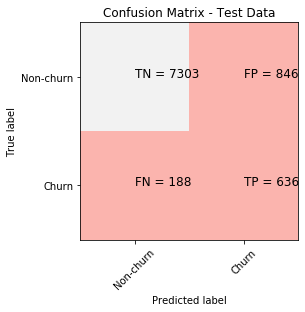

In [114]:
#Confusion Matrix
cm = confusion_matrix(y_test, pred_rfc_tune)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

## Feature Selection

In [112]:
feature_importance = rfc_tune.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(feature_importance, list(col_names)), reverse=True),columns={'Value','Column'})
#Showing only top 50 features that are helping to determine that the customer will churn or not
sorted_feature_importance[0:50].head()

,Column,Value
0,0.227397,total_month_rech_8
1,0.125614,total_ic_mou_8
2,0.081595,loc_ic_mou_8
3,0.076366,roam_og_mou_8
4,0.060714,total_rech_amt_8


## Business Consideration
- From the above we can clearly infer that calls related incoming & outgoing within a circle is key for identifying churn customers
- Especially the usage during the action phase when compared to good month (6th & 7th months) have reduced
- Recharge amount shows a dip in the action phase is sign of churn
- Age on network is also a key indicator for identifying the churn, churn is higher for lesser aon years and gradually decreases where the aon years are increasing.
- The usage of mobile data has also reduced when compared with 6th and 7th month. So, data usage & amount can also be the other features for understanding the churn behavior